# More Python / Numerical Python



In [2]:
import numpy as np
from astropy.io import fits
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pylab
import sys; sys.path.append('/home/a180i/lib/python/')
import a180
import os

## Index arrays

Sometimes we want to access only certain elements in a Python array.  We have seen some aspects of indexing before, for example, using the square brackets to access a single element or a range of elements:

In [3]:
x = np.array(['cat', 'dog', 'parrot', 'pig', 'hamster', 'horse', 'snake', 'tarantula'])
print(x[0])
print(x[3]) # remember indexing counts from 0
print(x[2:5]) # elements 2, 3, and 4

cat
pig
['parrot' 'pig' 'hamster']


However, sometimes we want to access non-contiguous sets of elements.  This is where index arrays come in.  An index array is a numpy array of indices.  (For n-dimensional arrays, it is a tuple of 1d numpy arrays; more later.)  We can then use the index array in the square brackets to get the elements in question.

In [4]:
ix = np.array([1,3,5]) # an index array
print(x[ix])

['dog' 'pig' 'horse']


We can even use them for assignment.

In [5]:
x[ix] = 'frog'
print(x)

['cat' 'frog' 'parrot' 'frog' 'hamster' 'frog' 'snake' 'tarantula']


## 2-d index arrays

We can use index arrays for 2d numpy arrays as well.  This structure is a tuple of arrays of 1d indices.

In [6]:
x = np.array(['cat', 'dog', 'parrot', 'pig', 'hamster', 'horse', 'snake', 'tarantula'])
x.shape = (2,4)
print(x)
ix = (np.array([0,0,0,1]), np.array([0,2,3,3]))
print(x[ix]) # see if you can guess what this will be

[['cat' 'dog' 'parrot' 'pig']
 ['hamster' 'horse' 'snake' 'tarantula']]
['cat' 'parrot' 'pig' 'tarantula']


## Using np.nonzero to get index arrays

We might be interested in finding certain locations where a condition is met.  For example, everywhere in an array that is above a certain threshold.  We use numpy arrays to do the appropriate comparison, which will give us an array of True/False boolean values.  We then use the nonzero function to get all the locations where the condition is True.

In [7]:
x = np.random.randn(5,5) # get a 5x5 array of random values, gaussian distributed with zero mean and sigma=1
print(x)
w = np.nonzero(x > 0.5) # get indices of all the locations above 0.5
print(w) # print the indices
print(x[w]) # print the values.  Note that this is a 1d array of values.

[[ 0.41449266 -0.31625358  0.41964714  0.4814216   0.491612  ]
 [-1.12180543  2.00381373 -0.6064973  -0.16678564 -0.02547297]
 [-1.19995896  1.26361145  0.09984381  0.66418159  0.29538064]
 [-0.82755294 -0.14947827 -1.07237295  1.23268588 -2.14825658]
 [ 1.568508   -0.51187876 -0.36372274 -2.49735963 -1.02441029]]
(array([1, 2, 2, 3, 4]), array([1, 1, 3, 3, 0]))
[2.00381373 1.26361145 0.66418159 1.23268588 1.568508  ]


## Working with directories and filenames

To combine a directory name and a file name, you can usually do something like 

``combined_filename = directory + filename``

However, what if the directory name does not have a ``/`` at the end? Adding the two variables will give an incorrect file name where the directory name and the file names are joined together. 

The way to avoid this is to use ``os.path.join``. This function will create a string that combines a directory name with a filename, taking care of the ending ``/`` for you. Try it below

In [8]:
directory_name1 = '/data/'
directory_name2 = '/data'
filename1 = 'file1.fits'

# Because one of the directory name is missing a /, the following two lines give different answers
print(directory_name1+filename1)
print(directory_name2+filename1)

# However, if we use os.path.join, you can avoid this bug
print(os.path.join(directory_name1,filename1))
print(os.path.join(directory_name2,filename1))

/data/file1.fits
/datafile1.fits
/data/file1.fits
/data/file1.fits


# Lab 4: Color-Magnitude Diagram


## Basic Data Reduction

One of the first tasks is to reduce all the data frames, namely through the creation of a flat field frames for each filter used, then sky-subtraction and flat-field correction of all target and photometric standard star exposures.


In [9]:
# lists of raw exposures.  Be sure to keep track of which filter they're used for.
#

data_dir = '/data/2023-Spring/20230602/'
reduced_dir = '/data/home/a180u/lab4_reduced/'

# dark exposures (used for calibrating flat field exposures)
raw_dark10_files = ["Dark_001.FIT",
                    "Dark_002.FIT",
                    "Dark_003.FIT"] # 10 secs dark frame

raw_dark60_files = ["Dark60_001.FIT",
                    "Dark60_002.FIT",
                    "Dark60_003.FIT"] # 60 secs dark frame (for standard star)

# raw flat field exposures
raw_flatR_files = ["FlatR_001.FIT",
                   "FlatR_002.FIT",
                   "FlatR_003.FIT"]

raw_flatV_files = ["FlatV1.FIT",
                   "FlatV2.FIT",
                   "FlatV3.FIT"]

# raw sky exposures
raw_skyV_files = ["SkyV_001.FIT",
                  "SkyV_002.FIT",
                  "SkyV1.FIT"]

raw_skyR_files = ["SkyR_001.FIT",
                  "SkyR_002.FIT",
                  "SkyR_003.FIT"]

# raw photometric standard star exposures
raw_stdstarV_files = ["StandardR_001.FIT",
                      "StandardR_002.FIT",
                      "StandardR3.FIT"]

raw_stdstarR_files = ["StandardV_001.FIT",
                      "StandardV_002.FIT",
                      "StandardV_003.FIT"]

# raw target exposures
raw_targetV_files = ["CenterV_001.FIT", "CenterV_002.FIT", "CenterV_003.FIT",
                    
                     "Corner1V_001.FIT", "Corner1V_002.FIT", "Corner1V_003.FIT",
                     "Corner2V_001.FIT", "Corner2V_002.FIT", "Corner2V_003.FIT",
                     "Corner3V_001.FIT", "Corner3V_002.FIT", "Corner3V_003.FIT",
                     "Corner4V_001.FIT", "Corner4V_002.FIT", "Corner4V_003.FIT"]

raw_targetR_files = ["CenterR_001.FIT", "CenterR_002.FIT", "CenterR_003.FIT",
                     
                     "Corner1R_001.FIT", "Corner1R_002.FIT", "Corner1R_003.FIT",
                     "Corner2R_001.FIT", "Corner2R_002.FIT", "Corner2R_003.FIT",
                     "Corner3R_001.FIT", "Corner3R_002.FIT", "Corner3R_003.FIT",
                     "Corner4R_001.FIT", "Corner4R_002.FIT", "Corner4R_003.FIT",]

In [10]:
# NOTE:  for the following, save the output into appropriate
#

####################################################################################################################################
# create the flat field frames

def load_and_combine(filenames, prefix=''):
    "Load and use median combination on a list of exposures.  Returns a numpy array."
    images = [] # define an empty list
    for fn in filenames:
        images.append(fits.getdata(prefix+fn)) # populate the list with image arrays from each file
    images = np.array(images) # turn the list into a 3d numpy array
    combined_im = np.median(images, axis=0) # use median combination along the first axis (image index)
    return combined_im

# process dark
dark_10im = load_and_combine(raw_dark10_files, prefix=data_dir) # load and combine dark exposures into a dark frame
dark_10fn = 'dark10.fits' # filename for our combined dark frame
fits.writeto(reduced_dir+dark_10fn, dark_10im, overwrite=True) # store the combined dark frame in a FITS file

dark_60im = load_and_combine(raw_dark60_files, prefix=data_dir) # load and combine dark exposures into a dark frame
dark_60fn = 'dark60.fits' # filename for our combined dark frame
fits.writeto(reduced_dir+dark_60fn, dark_60im, overwrite=True) # store the combined dark frame in a FITS file


# create V-band flat field
V_flat_im = load_and_combine(raw_flatV_files, prefix=data_dir) # for each flat field calibration frame, load all exposures and combine
V_flat_im = V_flat_im - dark_10im
V_flat_im /= np.median(V_flat_im) # normalize by median of combined array
V_flat_fn = 'v_flat.fits' # file names for flat field calibration frames

# create R-band flat field
R_flat_im = load_and_combine(raw_flatR_files, prefix=data_dir) # for each flat field calibration frame, load all exposures and combine
R_flat_im = R_flat_im - dark_10im
R_flat_im /= np.median(R_flat_im) # normalize by median of combined array
R_flat_fn = 'r_flat.fits' # file names for flat field calibration frames

# mark pixels with low or high values as NaN
thresh = (0.05, 2.5) # low and high thresholds for marking bad values
w = np.nonzero((V_flat_im < thresh[0]) | (V_flat_im > thresh[1]))  # note the | symbol does a logical OR operation
V_flat_im[w] = np.nan
w = np.nonzero((R_flat_im < thresh[0]) | (R_flat_im > thresh[1]))  # note the | symbol does a logical OR operation
R_flat_im[w] = np.nan

fits.writeto(reduced_dir+V_flat_fn, V_flat_im, overwrite=True)
fits.writeto(reduced_dir+R_flat_fn, R_flat_im, overwrite=True)

####################################################################################################################################
# process sky exposures

# process and store sky exposures for target, V band
V_sky_im = load_and_combine(raw_skyV_files, prefix=data_dir)
V_sky_fn = 'v_sky.fits'
fits.writeto(reduced_dir+V_sky_fn, V_sky_im, overwrite=True)

# process and store sky exposures for target, R band
R_sky_im = load_and_combine(raw_skyR_files, prefix=data_dir)
R_sky_fn = 'r_sky.fits'
fits.writeto(reduced_dir+R_sky_fn, R_sky_im, overwrite=True)

####################################################################################################################################

def process_photometry(raw_filename, sky_im, flat_im, raw_dir='', out_dir='', prefix='proc-'):
    "Calibriate a photometric exposure"
    out_fn = prefix + raw_filename   # output filename
    im = fits.getdata(raw_dir + raw_filename)   # load the input data
    proc_im = (im - sky_im) / flat_im # calibration steps
    fits.writeto(out_dir+out_fn, proc_im, overwrite=True)  # store the output
    return out_fn  # return the processed image filename


# iterate over all the exposures

proc_stdstarV_files = []
for file in raw_stdstarV_files:
    proc_stdstarV_files.append(process_photometry(file, V_sky_im, V_flat_im, raw_dir=data_dir, out_dir=reduced_dir))

proc_stdstarR_files = []
for file in raw_stdstarR_files:
    proc_stdstarR_files.append(process_photometry(file, R_sky_im, R_flat_im, raw_dir=data_dir, out_dir=reduced_dir))

proc_targetV_files = []
for file in raw_targetV_files:
    proc_targetV_files.append(process_photometry(file, V_sky_im, V_flat_im, raw_dir=data_dir, out_dir=reduced_dir))

proc_targetR_files = []
for file in raw_targetR_files:
    proc_targetR_files.append(process_photometry(file, R_sky_im, R_flat_im, raw_dir=data_dir, out_dir=reduced_dir))

## Creating mosaic images

Our aims are to get photometry on stars in the cluster.  Our data, however, are taken at multiple pointings, so stars may show up in one frame and not another.  They might also appear in multiple frames.  To combine our data effectively, we'll want to assign a unique identifier to each star.  And in order to do that, we can first create a combined mosaic image.



In [13]:
def create_mosaic(frame_offsets, filenames, dirc, show=False):
    "given a list of frame offsets and filenames, combine the images into a common mosaic frame"

    # compute the dimensions of the mosaic image
    # FIXME  replace im below with a real loaded image frame
    im = fits.getdata(dirc+filenames[0])
    im_shape = im.shape  # get the dimensions of the individual exposures (Ny, Nx)
    mos_shape = im_shape + np.max(frame_offsets, axis=0)  # dimensions of mosaic array    
    
    
    # create mosaic
    mos = np.zeros(mos_shape, dtype=float) + np.nan  # will hold mosaic array; initialize with NaN values
    counter = np.zeros(mos_shape, dtype=int)  # will hold number of images contributing to pixel; used later in averaging
    # accumulate images into mosaic frame
    for i, fn in enumerate(filenames):  # loop over calibrated V-band exposures
        
        im = fits.getdata(dirc+fn)  # load the image data from FITS       
        
        if i == 0:
            im = im**3
            im /= 5e7
        
        # process the image data (if necessary)
        pim = im # TEMP
        
        
        
        tempmos = mos[frame_offsets[i][0]:frame_offsets[i][0] + im_shape[0],
                      frame_offsets[i][1]:frame_offsets[i][1] + im_shape[1]]
        
        addmos = np.nansum(np.dstack((tempmos, pim)), 2)
        
        mos[frame_offsets[i][0]:frame_offsets[i][0] + im_shape[0],
            frame_offsets[i][1]:frame_offsets[i][1] + im_shape[1]] = addmos
        
        # increase the counter for where this image is placed
        counter[frame_offsets[i][0]:frame_offsets[i][0] + im_shape[0],
                frame_offsets[i][1]:frame_offsets[i][1] + im_shape[1]] += 1        
        
        
    # now divide by number of images to get the average
    w = np.nonzero(counter)
    mos[w] /= counter[w]

    # display the mosaic
    if show:
        plt.figure(figsize=(15,8))
        plt.imshow(mos, vmin=-50, vmax=100)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("Mosaic Field of View")
        plt.colorbar()
        plt.tight_layout()
        plt.show()# replace with plotting code
    
    # return the mosiac
    return mos

# Just run this cell to load in the mosaic code

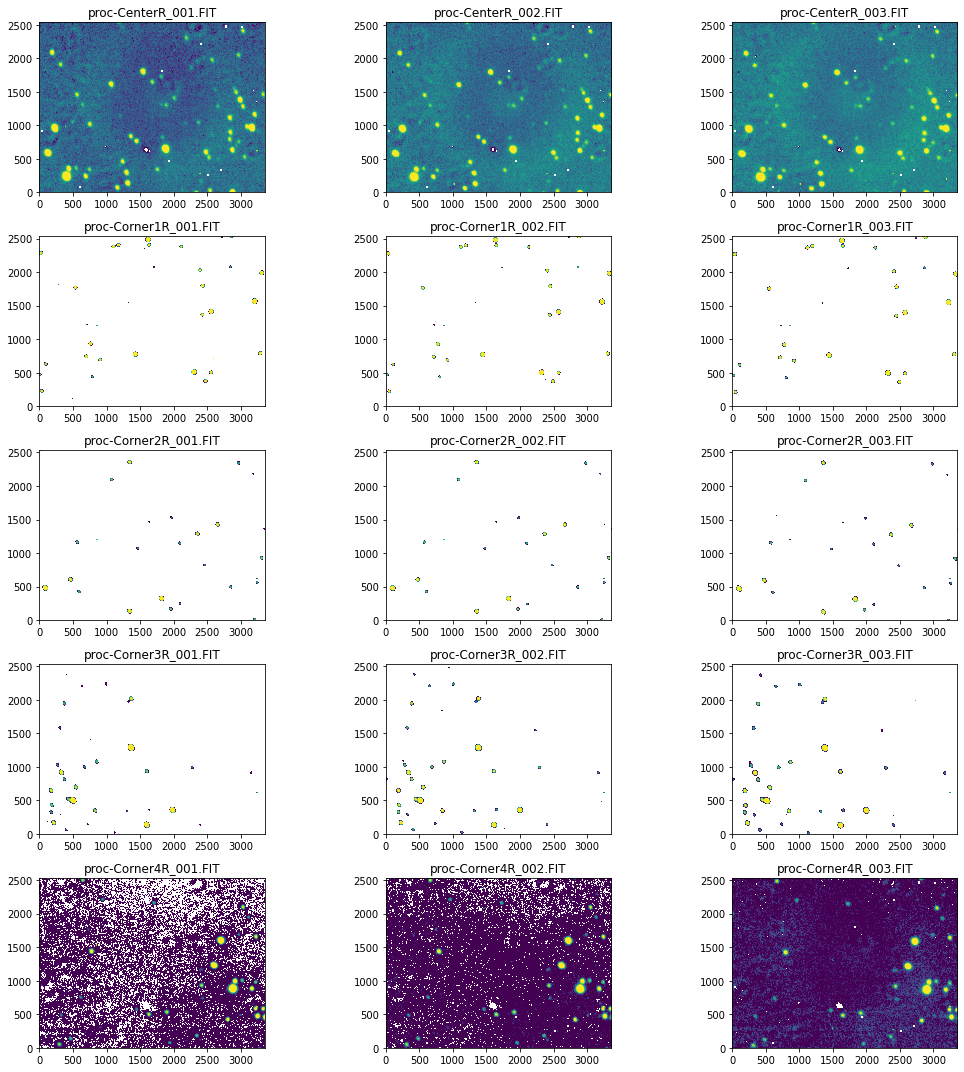

In [14]:
# visualize center and corner plots to help with mosaic
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
i, j = 0, 0
for file in proc_targetR_files:
    data = fits.getdata(reduced_dir+file)

    axes[i, j].imshow(data, norm=LogNorm(vmin=10, vmax = 100))

    axes[i, j].set_title(file)
    j += 1
    if j % 3 == 0:
        i += 1
        j = 0
plt.tight_layout()
plt.show()

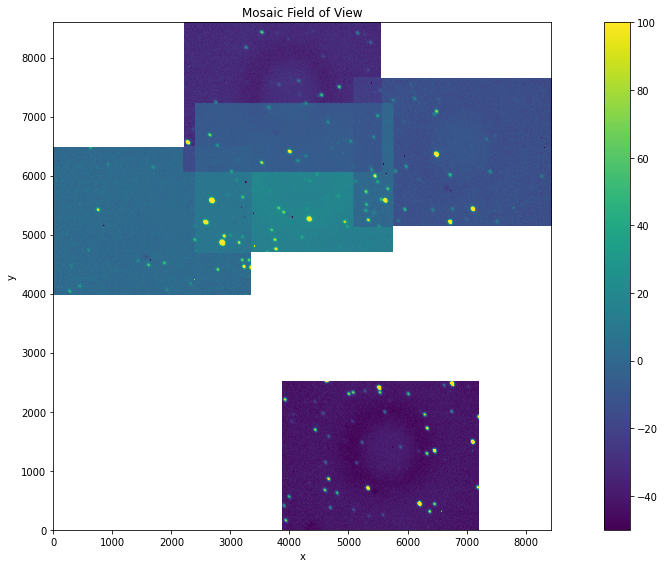

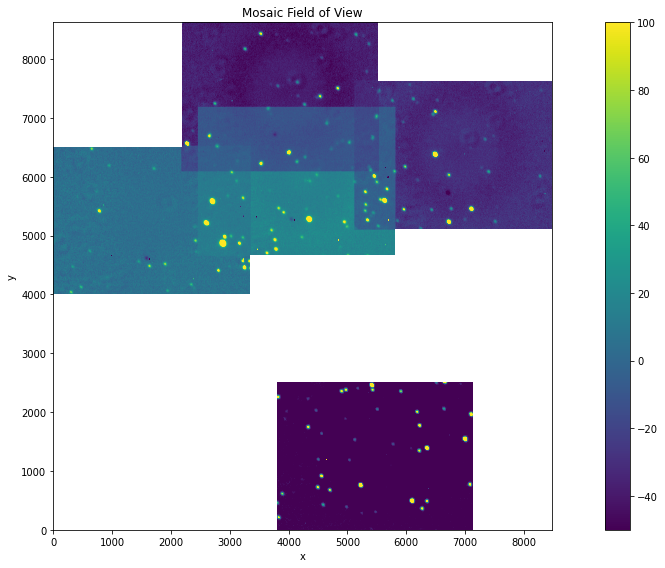

In [15]:
# create V-band mosaic

# This should be a list of (y, x) pairs for the offsets of each of the V-band exposures
#  NOTE  you will have to determine these
#  NOTE  it will probably be best if you have a consistent set of offsets among all filters so that the a given star appears in the same location in each mosaic
frame_offsets_V = [
                   (4690, 2400), (4690, 2400), (4690, 2400), # center
                   (0, 3860), (0, 3860), (0, 3860), # 1
                   (6060, 2200), (6060, 2200), (6060, 2200), # 2
                   (5130, 5080), (5130, 5080), (5130, 5080), # 3
                   (3960, 0), (3960, 0), (3960, 0), # 4
                  ]
frame_offsets_V = np.array(frame_offsets_V)

# create the mosaic
mos_V = create_mosaic(frame_offsets_V, proc_targetV_files, reduced_dir, show=True)

# save the mosaic to file
mosaic_savefile_V = "mosaic_V"
fits.writeto(os.path.join(reduced_dir,mosaic_savefile_V), mos_V, overwrite=True)

# create R-band mosaic

# This should be a list of (y, x) pairs for the offsets of each of the V-band exposures
#  NOTE  you will have to determine these
#  NOTE  it will probably be best if you have a consistent set of offsets among all filters so that the a given star appears in the same location in each mosaic
frame_offsets_R = [
                   (4650, 2460), (4650, 2460), (4650, 2460), # center
                   (0, 3790), (0, 3790), (0, 3790), # 1
                   (6090, 2180), (6090, 2180), (6090, 2180), # 2
                   (5100, 5120), (5100, 5120), (5100, 5120), # 3
                   (3990, 0), (3990, 0), (3990, 0), # 4
                  ]
frame_offsets_R = np.array(frame_offsets_R)

# create the mosaic
mos_R = create_mosaic(frame_offsets_R, proc_targetR_files, reduced_dir, show=True)

# save the mosaic to file
mosaic_savefile_R = "mosaic_R"
fits.writeto(os.path.join(reduced_dir,mosaic_savefile_R), mos_R, overwrite=True)

In [16]:
# after the previous steps and the data is saved, do you do not need to reduced the data again 
# everytime you run your notebook. You can just load in your files here

# uncomment and change to load in the saved files instead of recreating the mosaic each time

reduced_dir = '/data/home/a180u/lab4_reduced/'
mosaic_savefile_V = "mosaic_V"
mos_V = fits.getdata(os.path.join(reduced_dir, mosaic_savefile_V))

mosaic_savefile_R = "mosaic_R"
mos_R = fits.getdata(os.path.join(reduced_dir, mosaic_savefile_R))

## Identifying the stars

We'll want a method for identifying stars so that we can assign each a unique identifier.  We only really need to identify stars for which we can get detections in all bands.

We can make the identifications in the mosaic frame.  However, when we do photometry, we should try (if possible) to do it in each target exposure, then later combine the photometry.

We'll want a robust way of automatically identifying stars.  This could be done by first smoothing the image then identifying the peaks.  However, we have the confounding factor of cosmic ray hits.  (Note that they could be posive or negative, since we subtracted sky exposures.)  So we will first want to identify all the cosmic rays.  Then we can tag them with NaN values just as we did with bad pixels in the calibration steps above.  Finally, we can, for the identification steps, replace the NaN values with a combination of good values from the pixels' neighbors.

In [ ]:
# NOTE doing cosmic ray removal can take a really long time! 
# It's okay to skip this step if you took more than 1 image at each mosaic position and 
# you median combined them

from scipy.ndimage import median_filter, percentile_filter, gaussian_filter

def median_replace(im, medfilt=5):
    "replace NaN values with those determined from a local median filter"
    
    mfim = median_filter(im, size=medfilt,
                         #mode='constant',
                         cval=0.)

    # get locations where value is NaN
    w = np.isnan(im)
    # replace those locations in the image with values from the median-filtered image
    pim = im.copy()
    pim[w] = mfim[w]
    
    return pim


def identify_cr(im, thresh=10.):
    """
    return an index array of pixels flagged to be possible cosmic-ray hits.  
    thresh gives a factor fow how many times above (or below) the local background 
    sigma a pixel must be to be flagged.
    """

    # do a high-pass filter to take out "sky" variations
    skyfilt = 50 # [pix]
    sfim = im - median_filter(im, size=skyfilt,
                              #mode='constant',
                              cval=0.)

    
    
    # estimate the local image sigma.  Don't use standard deviation, since that will be biased by CRs.
    # Instead, use rank filters
    sigfilt = 10 # [pix]
    pf1 = percentile_filter(sfim, 50-34.1, size=sigfilt,
                            cval=0.)
    pf2 = percentile_filter(sfim, 50+34.1, size=sigfilt,
                            cval=0.)
    sig = (pf2-pf1)/2. # half dist. between locations of 1-sig confidence

    
    # now patch over NaNs with a median-filtered image
    medfilt = 5 # [pix]
    tsfim = median_replace(sfim, medfilt=medfilt)
    
    
   
    bad = (tsfim > tsfim + thresh*sig) | (tsfim < tsfim - thresh*sig)
    
####################### Most likely will need to call thresh at a lower value, like 3 ########################
    
    
    
    
    return np.nonzero(bad)


# use the above routines to identify CR values in the mosaics and mark them with NaN

# this can be very slow! Only run this if you find your data has too many cosmic rays.
mos_V = identify_cr(mos_V)
mos_R = identify_cr(mos_R)

# then replace all NaN values with median-filtered values. You can run this step even if you don't run
# the cosmic ray removal to get rid of NaNs

mos_V = median_replace(mos_V)
mos_R = median_replace(mos_R)

Now we should have clean mosaics in which we can identify stars.

To identify the stars automatically, we can first smooth by a Gaussian (to approximate the response of the imaging system to a point-like star, and reject noise that doesn't look like a star), then identify the peaks above a threshold.

Choose to identify in only one filter, such that those stars are detected in all filters and we don't have to do complicated cross-matching.

At the end of this identification step, we want to have in-hand a list of stellar $(x,y)$ positions in the mosaic frame.

1400 stars detected


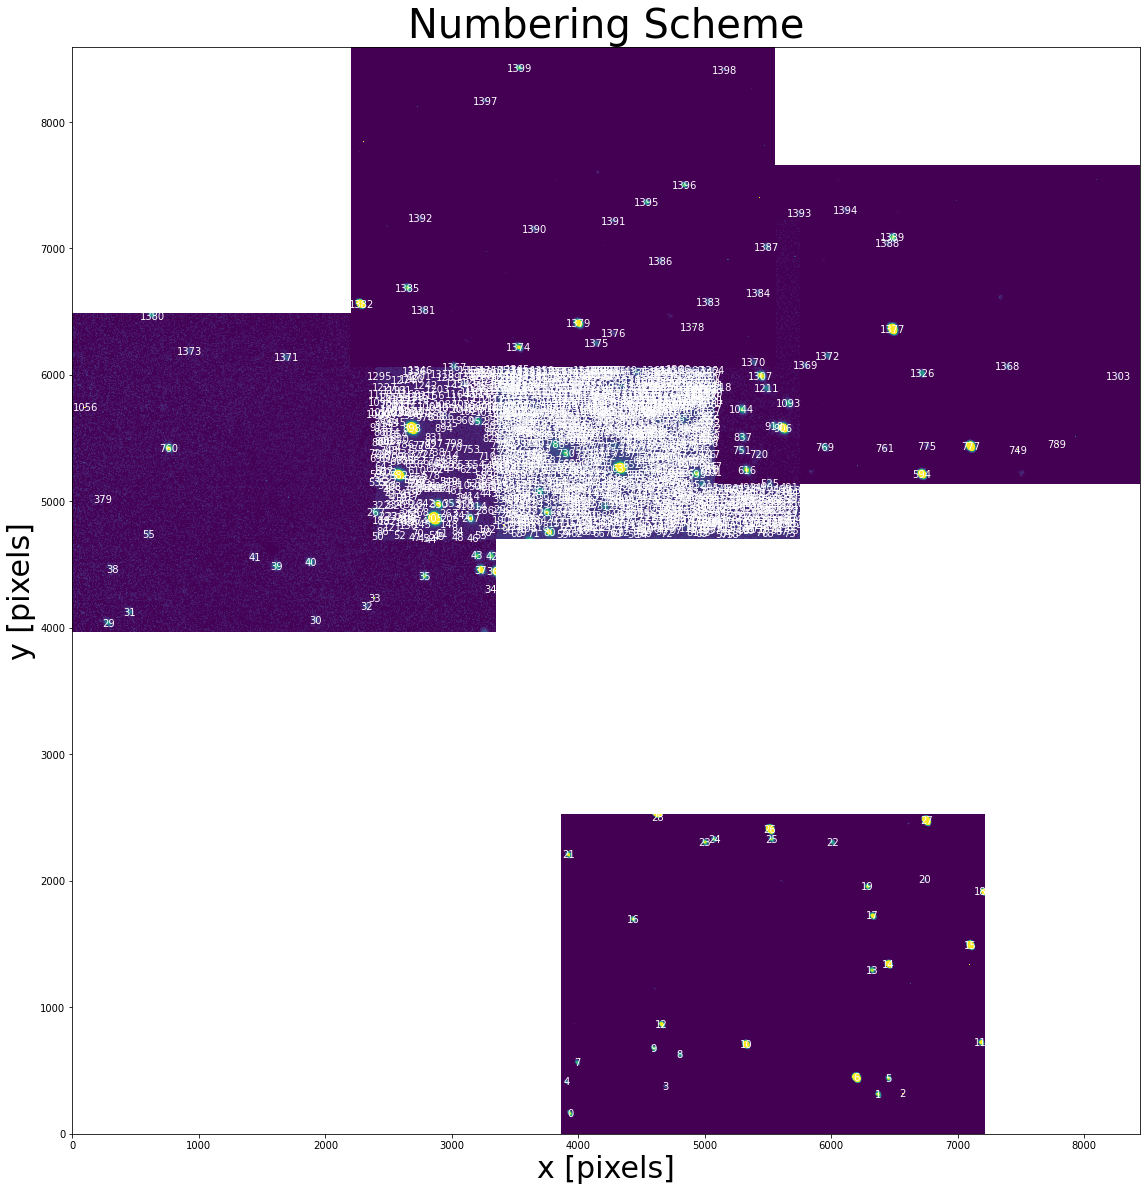

In [17]:
from scipy.ndimage import median_filter, percentile_filter, gaussian_filter
# filter the image with a gaussian

############## This needs to be small to avoid overlaps between stars ########################

psf_sig = 9. # [pix]  FIXME  adjust this to an appropriate value commensurate with the width of a star in the image

##################################################################################################


filtered_mosaic = gaussian_filter(mos_V, sigma=psf_sig) # apply the filter

# identify peaks in the image
from scipy.ndimage import maximum_filter
max_filt = int(2.35*psf_sig) # [pix] size of maximum filter
mim = maximum_filter(filtered_mosaic, size=max_filt)  # perform maximum filter


############################################################################################################

#ispeak = ((filtered_mosaic == mim) & (mosaic != 0.)) # value is equal to peak, but isn't zero in original mosaic

########## extra constraint for the peaks to avoid non-stars ################################

ispeak = ((filtered_mosaic == mim) & (filtered_mosaic != 0.) & (mim >= 10))

############## might need to adjust mim ##########################################


# now turn these into a list
peaklocs = np.nonzero(ispeak) # this is a 2-tuple of 1d arrays
starpos_mos = np.array(peaklocs).T # this is now an array of N stars by 2
N_star = starpos_mos.shape[0]
print("{} stars detected".format(N_star))

# show the mosaic and overlay the detections
#

# set up the figure
fig = pylab.figure(figsize=(30,20))
ax = fig.add_subplot(111)

# show the mosaic
ax.imshow(mos_V,origin='lower',vmin=0,vmax=100)
ax.set_xlabel("x [pixels]", fontsize=30)
ax.set_ylabel("y [pixels]", fontsize=30)
ax.set_title("Numbering Scheme", fontsize=40)

phot_rad = 50
sky_ann_inner_rad = 70
sky_ann_outer_rad = 120

# annotate the star detections
for i in range(N_star):
    y, x = starpos_mos[i,:]
    # draw a circle centered at this location
    
    # write the star number
    ax.text(x, y, i,
            horizontalalignment='center',
            verticalalignment='center',
            color='white'
            )
    
#     # overlay a circle for the photometric aperture
#     ax.add_patch(mpl.patches.Circle((x,y), # center of the circle
#                                     radius=phot_rad, # radius of the circle
#                                     ec='b', # sets the circle edge color to blue
#                                     fill=False, # does not fill the circle with color
#                                    ))

#     # overlay a circle for the sky annulus inner radius
#     ax.add_patch(mpl.patches.Circle((x,y), # center of the circle
#                                     radius=sky_ann_inner_rad, # radius of the circle
#                                     ec='r', # sets the circle edge color to blue
#                                     fill=False, # does not fill the circle with color
#                                    ))

#     # overlay a circle for the sky annulus outer radius
#     ax.add_patch(mpl.patches.Circle((x,y), # center of the circle
#                                     radius=sky_ann_outer_rad, # radius of the circle
#                                     ec='r', # sets the circle edge color to blue
#                                     fill=False, # does not fill the circle with color
#                                    ))

pylab.draw()
pylab.show()

## Computing photometry in each target exposure

Now we have a list of stellar positions in the master mosaic frame.

We'll want to do the photometry in the individual (calibrated, sky-subtracted) exposures.

Not all stars will appear in each exposure.  We will compute the coordinates of all stars in the frame of each exposure (using the frame offsets above), and only get photometry on those stars whose coordinates fall in the field of view.

In [18]:
from a180 import ap_phot

def photometry(raw_file, proc_file, xy, raw_dir = '', proc_dir='', t = 60, phot_rad = 50, sky_ann_inner_rad = 70, sky_ann_outer_rad = 120):
    
    F = []
    F_err = []

    data1, hdr1 = fits.getdata(raw_dir+raw_file, header=True)
    data2, hdr2 = fits.getdata(proc_dir+proc_file, header=True)

    gain = hdr1['EGAIN']

    try:
        phot, phot_err = ap_phot(data2, xy[1], xy[0], 
                     phot_rad, 
                     sky_in=sky_ann_inner_rad, 
                     sky_out=sky_ann_outer_rad, 
                     gain=gain)  # get the aperture photometry
        
    except AssertionError:
        new_out_rad = np.min(np.append(data2.shape-xy, xy))-3
        
        if new_out_rad <= 0:
            return np.nan, np.nan
        phot, phot_err = ap_phot(data2, xy[1], xy[0], 
                     0.8*new_out_rad, 
                     sky_in=0.9*new_out_rad, 
                     sky_out=new_out_rad, 
                     gain=gain)  # get the aperture photometry
        
        
    F.append(phot)
    F_err.append(phot_err)

    F, F_err = np.array(F), np.array(F_err)
    
    F /= t  # [DN] -> [DN/s]
    F_err /= t  # [DN] -> [DN/s]

    return F[0], F_err[0]

In [19]:
# let's create a data structure to hold the photometry.  
# For a given filter, each star will have a list of photometric measurements.
# Each measurement will correpsond to a (flux, flux_err) tuple
# and we'll have a list of all the stars.
# So in the end, we'll have a list of lists of 2-tuples.
# To start off, we'll have to make a list of length N_star of empty lists.
photometry_V = [[] for i in range(N_star)] # creates a list of empty lists
photometry_R = [[] for i in range(N_star)]

# now let's loop over all the exposures for this filter
for i, filename in enumerate(proc_targetV_files):
    # load the calibrated image data
    im = fits.getdata(reduced_dir+filename)
    im_shape = im.shape
    
    # get the offset of this frame
    frame_offset = frame_offsets_V[i,:]
    
    for j in range(N_star):
        # compute positions of star in this frame
        starpos = starpos_mos[j,:]-frame_offset  # use starpos_mos and frame_offset

        # select stars which fall in this exposure
        # use im_shape to find which ones fall in frame
        if not(np.sum(starpos > 0)==2 and starpos[0] <= im_shape[0] and starpos[1] <= im_shape[1]):
            continue # breaks out of for loop and moves on to next one 
        
        # get aperture photometry for this star
        flux, flux_err = photometry(raw_targetV_files[i], filename, starpos, raw_dir = data_dir, proc_dir=reduced_dir)
        
        # store in our data structure
        photometry_V[j].append((flux, flux_err))

In [20]:
# now repeat for other filters

for i, filename in enumerate(proc_targetR_files):
    # load the calibrated image data
    im = fits.getdata(reduced_dir+filename)
    im_shape = im.shape
    
    # get the offset of this frame
    frame_offset = frame_offsets_R[i,:]
    
    for j in range(N_star):
        # compute positions of star in this frame
        starpos = starpos_mos[j,:]-frame_offset  # use starpos_mos and frame_offset

        # select stars which fall in this exposure
        # use im_shape to find which ones fall in frame
        if not(np.sum(starpos > 0)==2 and starpos[0] <= im_shape[0] and starpos[1] <= im_shape[1]):
            continue # breaks out of for loop and moves on to next one 
        
        # get aperture photometry for this star
        flux, flux_err = photometry(raw_targetR_files[i], filename, starpos, raw_dir = data_dir, proc_dir=reduced_dir)
        
        # store in our data structure
        photometry_R[j].append((flux, flux_err))

## Combining photometry

Now we have, for each filter, a list of photometric measurements (fluxes and estimated errors) for every star.  We want to combine these measurments so that there is a single quantity (flux and error) for each star in each filter.

In [21]:
flux_V, flux_V_err = [], []
flux_R, flux_R_err = [], []

for flux_meas in photometry_V: # loop over each star's photometry
    # turn into an array
    flux_meas = np.array(flux_meas)

    fluxs = flux_meas[:,0] # all the fluxes
    flux_errs = flux_meas[:,1] # all the errors
    
    # combine
    flux = np.mean(fluxs)
    flux_err = np.sqrt(np.sum(flux_errs**2))/len(fluxs)
    
    # store in output
    flux_V.append(flux)
    flux_V_err.append(flux_err)
    
for flux_meas in photometry_R: # loop over each star's photometry
    # turn into an array
    flux_meas = np.array(flux_meas)

    try:
        fluxs = flux_meas[:,0] # all the fluxes
        flux_errs = flux_meas[:,1] # all the errors
    except IndexError:
        fluxs = np.array([np.nan])
        flux_errs = np.array([np.nan])
    
    # combine
    flux = np.mean(fluxs)
    flux_err = np.sqrt(np.sum(flux_errs**2))/len(fluxs)
    
    # store in output
    flux_R.append(flux)
    flux_R_err.append(flux_err)
    
flux_V = np.abs(np.array(flux_V))
flux_V_err= np.abs(np.array(flux_V_err))

flux_R = np.abs(np.array(flux_R))
flux_R_err= np.abs(np.array(flux_R_err))

## Photometric calibration

We need to use the photometric standard star observations to calibrate the photometry into magnitudes, with associated error.

In [22]:
from numpy import unravel_index

# center of standard stars
stdV_xys = [(1560, 1180), (1560, 1160), (1550, 1175)]
stdR_xys = [(1565, 1170), (1560, 1160), (1570, 1155)]

F0_V, F0_V_err = [], []
F0_R, F0_R_err = [], []

for i in range(len(proc_stdstarV_files)):
    F_V_std, F_V_std_err = photometry(raw_stdstarV_files[i], proc_stdstarV_files[i], stdV_xys[i], raw_dir = data_dir, proc_dir=reduced_dir)
    F_R_std, F_R_std_err = photometry(raw_stdstarR_files[i], proc_stdstarR_files[i], stdR_xys[i], raw_dir = data_dir, proc_dir=reduced_dir)
    
    F0_V.append(F_V_std)
    F0_V_err.append(F_V_std_err)
    F0_R.append(F_R_std)
    F0_R_err.append(F_R_std_err)

F0_V = np.abs(np.mean(F0_V))
F0_V_err = np.abs(np.sqrt(np.sum(F0_V_err*2))/3)
F0_R = np.abs(np.mean(F0_R))
F0_R_err = np.abs(np.sqrt(np.sum(F0_R_err*2))/3)

m0_V, m0_V_err = 12.636, 0.001
m0_R, m0_R_err = 12.636-1.185, 0.001

m_V = m0_V-2.5*np.log10(flux_V/F0_V)
m_V_err = np.sqrt(m0_V_err**2 + (-2.5/(flux_V*np.log(10))*flux_V_err)**2 + (2.5/(F0_V*np.log(10))*F0_V_err)**2)
m_R = m0_R-2.5*np.log10(flux_R/F0_R)
m_R_err = np.sqrt(m0_R_err**2 + (-2.5/(flux_R*np.log(10))*flux_R_err)**2 + (2.5/(F0_R*np.log(10))*F0_R_err)**2)

m_V_err[m_V_err>1] = 0.1
m_R_err[m_R_err>1] = 0.1

## Color-Magnitude Diagram

Now that we have the photometry for each star in magnitudes (with errors), we can compute the color magnitude diagram, with errorbars.

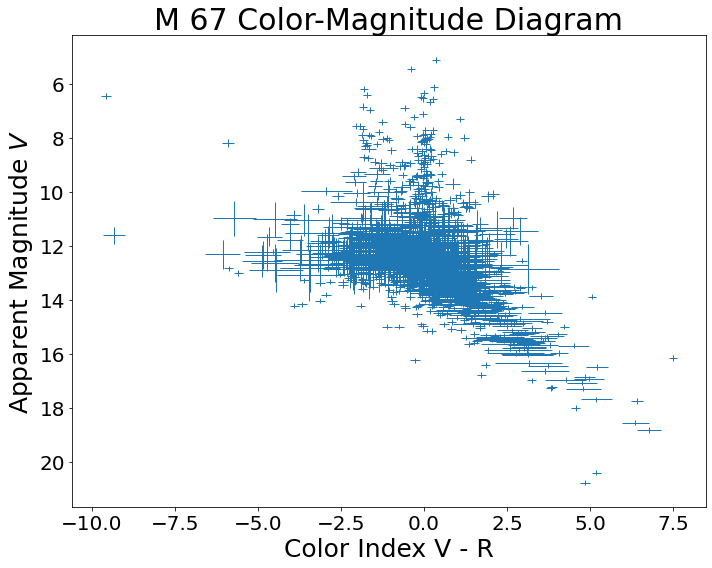

In [23]:
import matplotlib
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# use errorbar function to make scatter plot with errors in both dimensions

color = m_V-m_R
color_err = np.sqrt(m_V_err**2 + m_R_err**2)

plt.figure(figsize=(10, 8))
plt.errorbar(color, m_V, xerr=color_err, yerr=m_V_err, marker='.', linestyle=" ", ms=1, elinewidth=1)

plt.gca().invert_yaxis()
plt.title("M 67 Color-Magnitude Diagram", fontsize=30)
plt.xlabel("Color Index V - R", fontsize=25)
plt.ylabel("Apparent Magnitude $V$", fontsize=25)
plt.tight_layout()
plt.show()